# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [5]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

Adj Close: Corrige retroactivamente la serie de precios para que sea continua y comparable. Por ejemplo, si una acción vale 100 USD y hay un split 2:1, el “Close” bajaría a 50 USD, pero el “Adj Close” reescala todo el historial para que ese cambio no distorsione el análisis.

In [10]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18" )["Close"]
datos.head() # Veo los primeros 5 datos

/tmp/ipython-input-3282826101.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18" )["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-01-03,170.404495,144.088470,324.504547
2022-01-04,167.522003,143.434937,318.940277
2022-01-05,164.356995,136.717896,306.696838
2022-01-06,163.253998,136.616089,304.273315
2022-01-07,162.554001,136.073318,304.428467


In [11]:
datos.tail() # Veo los últimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-11,229.949997,240.779999,501.010010
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009
2025-09-17,231.619995,249.850006,510.019989


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

La acción que muestra mayor crecimiento en el periodo de 3 años es microsoft

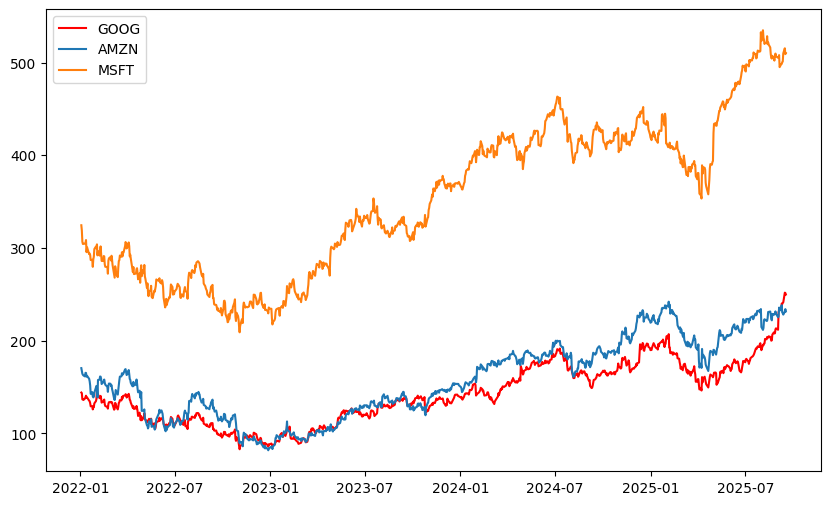

In [12]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN")
plt.plot(datos["MSFT"], label="MSFT")
plt.legend()
plt.show()

In [18]:
import plotly.express as px

In [17]:
datos.px
plt.show()

AttributeError: 'DataFrame' object has no attribute 'px'

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

Los precios ayudan a observar la tendencia general y saber si la accion sube o baja, y las rentabilidades son cambios en el precio y representa la ganancia o perdida que genere

/tmp/ipython-input-4109552330.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


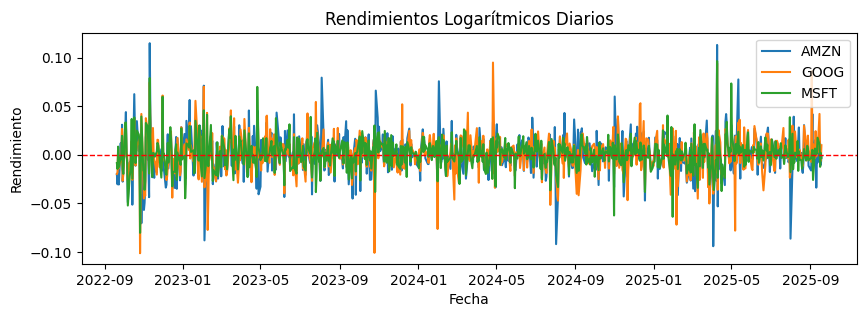

In [35]:
# COMPLETAR: calcula los rendimientos logarítmicos

df = yf.download(acciones, period="3y")["Close"]

rendimientos = np.log(df / df.shift(1))
rendimientos.head()

plt.figure(figsize=(10,3))
plt.plot(rendimientos)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Rendimientos Logarítmicos Diarios")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento")
plt.legend(rendimientos.columns)
plt.show()

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

In [37]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean
volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
print(media)
print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
<bound method DataFrame.mean of Ticker          AMZN      GOOG      MSFT
Date                                    
2022-09-19       NaN       NaN       NaN
2022-09-20 -0.020013 -0.019643 -0.008502
2022-09-21 -0.030327 -0.018035 -0.014541
2022-09-22 -0.010430  0.005584  0.008460
2022-09-23 -0.030553 -0.014019 -0.012779
...              ...       ...       ...
2025-09-12 -0.007859  0.002489  0.017589
2025-09-15  0.014274  0.042104  0.010651
2025-09-16  0.011257 -0.001351 -0.012339
2025-09-17 -0.010437 -0.006264  0.001923
2025-09-18 -0.001685  0.009877 -0.003083

[753 rows x 3 columns]>

Volatilidad diaria:
Ticker
AMZN    0.021280
GOOG    0.019836
MSFT    0.015977
dtype: float64


In [44]:
accion_mas_riesgosa = volatilidad.idxmax()

print("La acción más riesgosa (con mayor volatilidad) es:", accion_mas_riesgosa)

La acción más riesgosa (con mayor volatilidad) es: AMZN


In [45]:
accion_mayor_retorno = media.idxmax()

AttributeError: 'function' object has no attribute 'idxmax'

## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

In [ ]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = # COMPLETAR AQUÍ
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [ ]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

retorno_portafolio = # COMPLETAR AQUÍ
covarianza = # COMPLETAR AQUÍ
vol_portafolio = # COMPLETAR AQUÍ

print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diaria):", vol_portafolio)

## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?
- ¿Qué tan correlacionadas están las acciones?
- ¿Qué aportó la diversificación al portafolio?
- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.